### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food fit'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged.csv'))

In [5]:
pd.set_option('precision', 0)

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df.shape

(6213092, 11)

In [8]:
df.head()

,Unnamed: 0,Area,Element_x,Year,Unit_x,Value_x,Element_y,Months,Unit_y,Value_y,_merge
0,0,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Temperature change,January,?C,1.596,both
1,1,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Standard Deviation,January,?C,1.947,both
2,2,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Temperature change,February,?C,-0.881,both
3,3,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Standard Deviation,February,?C,2.590,both
4,4,Afghanistan,Emissions (CH4),2000,kilotonnes,308.486,Temperature change,March,?C,-0.237,both


In [9]:
df.columns

Index(['Unnamed: 0', 'Area', 'Element_x', 'Year', 'Unit_x', 'Value_x',
       'Element_y', 'Months', 'Unit_y', 'Value_y', '_merge'],
      dtype='object')

In [10]:
df['Element_x'].value_counts()

Emissions (CO2eq) (AR5)             904264
Emissions (N2O)                     896784
Emissions (CO2eq) from N2O (AR5)    896784
Emissions (CH4)                     754222
Emissions (CO2eq) from CH4 (AR5)    754222
Direct emissions (N2O)              693940
Indirect emissions (N2O)            693940
Emissions (CO2)                     618936
Name: Element_x, dtype: int64

In [11]:
df.isnull().sum()

Unnamed: 0    0
Area          0
Element_x     0
Year          0
Unit_x        0
Value_x       0
Element_y     0
Months        0
Unit_y        0
Value_y       0
_merge        0
dtype: int64

In [12]:
emCO2 = df.loc[df['Element_x'] == 'Emissions (CO2)']

In [13]:
emCO2.head()

,Unnamed: 0,Area,Element_x,Year,Unit_x,Value_x,Element_y,Months,Unit_y,Value_y,_merge
476,476,Afghanistan,Emissions (CO2),2000,kilotonnes,-2388.803,Temperature change,January,?C,1.596,both
477,477,Afghanistan,Emissions (CO2),2000,kilotonnes,-2388.803,Standard Deviation,January,?C,1.947,both
478,478,Afghanistan,Emissions (CO2),2000,kilotonnes,-2388.803,Temperature change,February,?C,-0.881,both
479,479,Afghanistan,Emissions (CO2),2000,kilotonnes,-2388.803,Standard Deviation,February,?C,2.590,both
480,480,Afghanistan,Emissions (CO2),2000,kilotonnes,-2388.803,Temperature change,March,?C,-0.237,both


In [14]:
df2=emCO2[['Year','Value_x','Value_y']]

### 2. The elbow technique

In [15]:
# define range of potential clusters
num_cl = range(1, 5)

# define k-means clusters in the range from above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [16]:
# create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]

score

[-5709596306823724.0,
 -2855844664472472.5,
 -1558732814164966.0,
 -866359028039311.4]

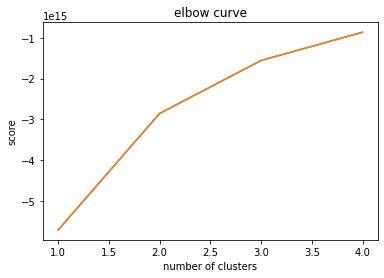

In [17]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('elbow curve')
pl.plot(num_cl,score)
pl.show()

# breakpoint is clearly 3

### 3. k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [19]:
kmeans.fit(df2)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [20]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\Marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Marce\AppData\Local\Temp/ipykernel_7836/3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [21]:
df2.head(5)

,Year,Value_x,Value_y,clusters
476,2000,-2388.803,1.596,0
477,2000,-2388.803,1.947,0
478,2000,-2388.803,-0.881,0
479,2000,-2388.803,2.590,0
480,2000,-2388.803,-0.237,0


In [22]:
df2["clusters"].value_counts()

0    609586
2      5440
1      3910
Name: clusters, dtype: int64

In [23]:
df2.describe()

,Year,Value_x,Value_y,clusters
count,618936.000,618936.000,618936.000,618936.000
mean,2009.523,10970.218,0.838,0.024
std,5.763,96046.198,0.788,0.202
min,2000.000,-730942.230,-9.303,0.000
25%,2005.000,0.000,0.415,0.000
50%,2010.000,215.977,0.687,0.000
75%,2015.000,4967.686,1.115,0.000
max,2019.000,1627228.432,11.759,2.000


In [24]:
df2.median()

Year       2010.000
Value_x     215.977
Value_y       0.687
clusters      0.000
dtype: float64

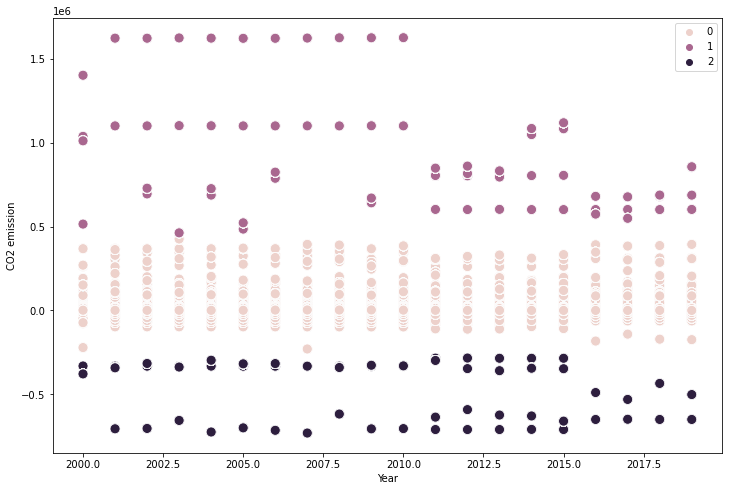

In [25]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Year'], y=df2['Value_x'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('CO2 emission') # Label y-axis.
plt.savefig('cluster.png')
plt.show()

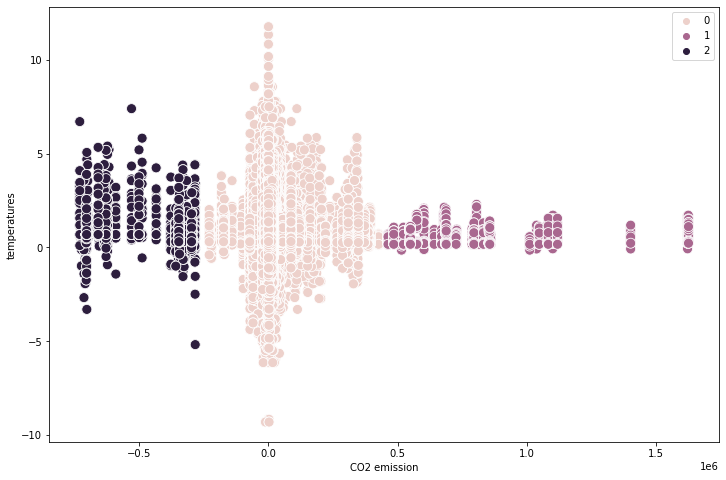

In [26]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Value_x'], y=df2['Value_y'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('CO2 emission') # Label x-axis.
plt.ylabel('temperatures') # Label y-axis.
plt.savefig('cluster2.png')
plt.show()

In [27]:
df2.loc[df2['clusters'] == 0, 'clusters'] = 'red'
df2.loc[df2['clusters'] == 1, 'clusters'] = 'blue'
df2.loc[df2['clusters'] == 2, 'clusters'] = 'green'

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [28]:
df2.groupby('clusters').agg({'Value_x':['mean', 'median'],
                         'Value_y':['mean', 'median'], 
                         'Year':['mean', 'median']})

Value_x             Value_y            Year         
                mean      median    mean median     mean   median
clusters                                                         
blue      862585.752  795945.189   0.587  0.398 2010.357 2011.000
green    -480582.390 -349108.853   0.978  0.746 2009.350 2010.000
red         9894.454     218.881   0.838  0.687 2009.519 2010.000

###